In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [64]:
import numpy as np
import scipy.stats as sts
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [5]:
# connect to our SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
#List column names in ORM Objects
print("Measurement",[col for col in dir(Measurement) if not col.startswith('_')])
print("Station",[col for col in dir(Station) if not col.startswith('_')])

Measurement ['classes', 'date', 'id', 'metadata', 'prcp', 'prepare', 'station', 'tobs']
Station ['classes', 'elevation', 'id', 'latitude', 'longitude', 'metadata', 'name', 'prepare', 'station']


# Exploratory Climate Analysis

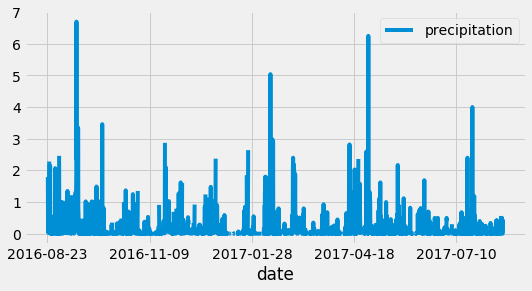

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# In order to save our results as a DataFrame, we need to provide our results variable 
# as one parameter and specify the column names as our second parameter
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# To print a DataFrame with the index: print(df)
# Print the DataFrame without the index - need to use a slightly different print statement.
# First convert the DataFrame to strings, and then set index to “False.” 
# This will allow us to print the DataFrame without the index
# print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=[8,4])

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# How many stations are available in this dataset?
# need to add the .all() function to the end of this query so that our results are returned as a list
session.query(func.count(Station.station)).all()

[(9)]

In [29]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

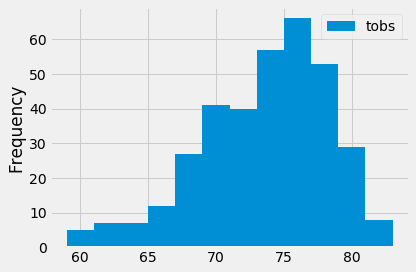

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [80]:
# June weather data
results = []
results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6).all()

# Save the query results as a DataFrame, set the index to the date column, and sort the index
june_df = pd.DataFrame(results, columns=['date','temperature','precipitation'])
june_df.set_index(june_df['date'], inplace=True)
june_df = june_df.sort_index()

june_median = june_df['temperature'].median()

# Get stats on weather data
print(june_df.describe())
print("")
print(f"median  {june_median}")
print("")
print(sts.mode(june_df['temperature']))

       temperature  precipitation
count  1700.000000    1574.000000
mean     74.944118       0.136360
std       3.257417       0.335731
min      64.000000       0.000000
25%      73.000000       0.000000
50%      75.000000       0.020000
75%      77.000000       0.120000
max      85.000000       4.430000

median  75.0

ModeResult(mode=array([76.]), count=array([194]))


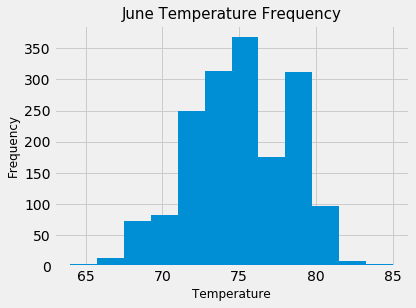

In [75]:
# Plot June temperature data as a histogram
june_df['temperature'].plot.hist(bins=12, figsize=[6,4.5])
plt.title("June Temperature Frequency", fontsize=15)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Save the figure.
plt.savefig("June_Temp.png")

plt.tight_layout()

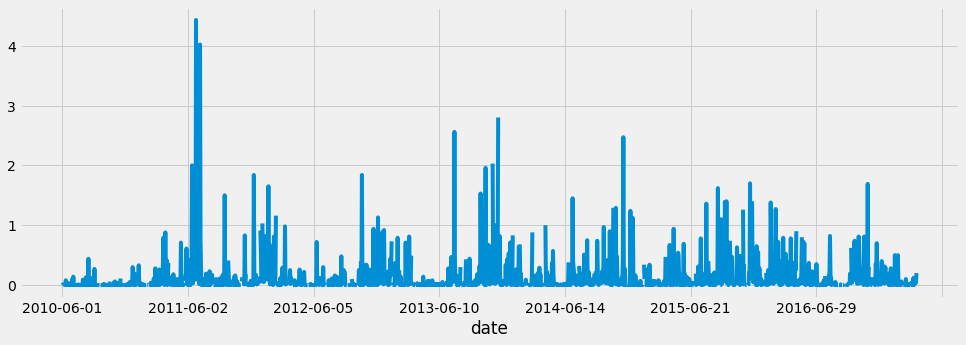

In [36]:
# Plot June precipitation to get a visual
june_precip = june_df['precipitation']

june_precip.plot(figsize=[15,5])

In [81]:
# December weather data
results = []
results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12).all()

# Save the query results as a DataFrame, set the index to the date column, and sort the index
december_df = pd.DataFrame(results, columns=['date','temperature','precipitation'])
december_df.set_index(december_df['date'], inplace=True)
december_df = december_df.sort_index()

december_median = december_df['temperature'].median()


# Get stats on weather data
print(december_df.describe())
print("")
print(f"median  {december_median}")
print("")
print(sts.mode(december_df['temperature']))

       temperature  precipitation
count  1517.000000    1405.000000
mean     71.041529       0.216819
std       3.745920       0.541399
min      56.000000       0.000000
25%      69.000000       0.000000
50%      71.000000       0.030000
75%      74.000000       0.150000
max      83.000000       6.420000

median  71.0

ModeResult(mode=array([71.]), count=array([174]))


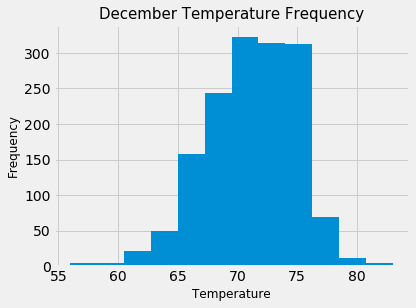

In [76]:
# Plot December temperature data as a histogram
december_df['temperature'].plot.hist(bins=12, figsize=[6,4.5])
plt.title("December Temperature Frequency", fontsize=15)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Save the figure.
plt.savefig("Dec_Temp.png")

plt.tight_layout()

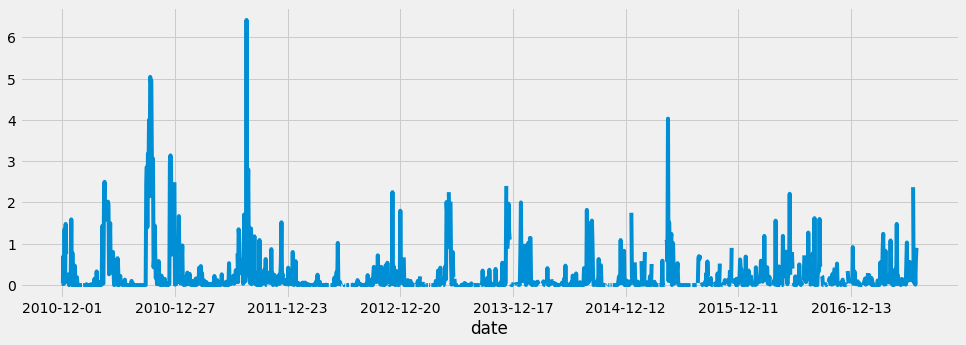

In [53]:
# Plot December precipitation to get a visual
december_precip = december_df['precipitation']

december_precip.plot(figsize=[15,5])

## Summary

We have done a preliminary analysis of seasonal differences on Oahu by looking at the historical temperatures for June and December for the years 2010 through Aug 2017.  Key findings:

+ While there is a noticeable difference in temperatures between June and December in Oahu, the variance is not as extreme as you will find in places like the Northeast of the US.  The two months are relatively similar, with only a four-degree difference in average temperature (June 75 F and December 71 F).
+ There is only a two-degree difference between the maximum temperature, with June at 85 and December at 83, but an eight-degree difference in the minimum temperature with June at 64 and December at 56.  December exhibits a broader range of temperatures with 27 degrees between max and min compared to 21 for June.
+ Looking at a frequency distribution, June is more likely to have days over 75 degrees than December, and December is more likely to have days where temperatures dip below 70 degrees.  


On average, the two months are similar in temperature, with December being noticeably cooler.  The cooler temperature in December may lead to lighter customer traffic for surfing and ice cream but is not significant enough to suggest a drastic dropoff.  We expect that some locals and tourists from warmer climates may be less likely to surf in December. Still, the diehard surfers and tourists from colder climates will find the temperature range suitable for these activities.  Our belief is we will see a seasonal slowdown, but not a full stop in service.


Additional analysis to consider:
+ Extending the current study on temperature trends for June and December to include precipitation trends may give further insights on potential seasonal impacts.  A combination of higher or more frequent rainfall, in conjunction with lower temperatures, may have a more severe effect on customer traffic.
+ The statistical weather data should be pulled and summarized for all months and charted to show the seasonal cycle.  This data can help inform sales and marketing strategies to help offset season slowdowns.
+ Further extending the analysis down to the station level will help prioritize a geographic expansion plan as we look to open additional sites across Oahu.



#### Temperature Difference Between June and December

<table border="1" class = "striped" style="width:40%" align= "left">
  <thead>
    <tr>
      <th style="text-align:center">Statisitics</th>
      <th style="text-align:center">June Temperatures</th>
      <th style="text-align:center">December Temperatures</th>
      <th style="text-align:center">Difference</th>  
    </tr>
  </thead>
  <tbody>
    <tr align="right">
      <td> Sample Size</td>
      <td> 1,700</td>
      <td> 1,517</td>  
      <td> (183)</td>  
    </tr>
    <tr align="right">
      <td> Mean</td>
      <td> 74.9</td>
      <td> 71.0</td>  
      <td> (3.9)</td>  
    </tr>
    <tr align="right">
      <td> Median</td>
      <td> 75</td>
      <td> 71</td>  
      <td> (4)</td>  
    </tr>  
    <tr align="right">
      <td> Standard Deviation</td>
      <td> 3.3</td>
      <td> 3.7</td>  
      <td> 0.5</td>  
    </tr>
    <tr align="right">
      <td> Minimum</td>
      <td> 64</td>
      <td> 56</td>  
      <td> (8)</td>  
    </tr>
    <tr align="right">
      <td> 25th Percentile</td>
      <td> 73</td>
      <td> 69</td>  
      <td> (4)</td>  
    </tr>
    <tr align="right">
      <td> 50th Percentile</td>
      <td> 75</td>
      <td> 71</td>  
      <td> (4)</td>  
    </tr>
    <tr align="right">
      <td> 75th Percentile</td>
      <td> 77</td>
      <td> 74</td>  
      <td> (3)</td>  
    </tr>  
    <tr align="right">
      <td> Maximum</td>
      <td> 85</td>
      <td> 83</td>  
      <td> (2)</td>  
    </tr>
    <tr align="right">
      <td> Mode</td>
      <td> 76</td>
      <td> 71</td>  
      <td> (4)</td>  
    </tr>
  </tbody>
</table>



